# Hypothesis testing

***Análisis del Rendimiento Diario***

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
# import microsoft.csv, and add a new feature - logreturn
data = pd.read_csv('C:/Users/Usuario/Desktop/proyectos/Analisis_Financiero_1/Datasets/portfolio_data.csv', index_col=0, parse_dates=True)
data.head()

,AMZN,DPZ,BTC,NFLX
Date,,,,
2013-05-01,248.229996,51.190983,106.250000,30.415714
2013-05-02,252.550003,51.987320,98.099998,30.641428
2013-05-03,258.049988,52.446388,112.900002,30.492857
2013-05-06,255.720001,53.205257,109.599998,30.098572
2013-05-07,257.730011,54.151505,113.199997,29.464285


**Tendencia del Precio**

El precio parece estar mostrando una tendencia alcista.
Inicialmente, parece que el promedio del rendimiento diario es positivo.

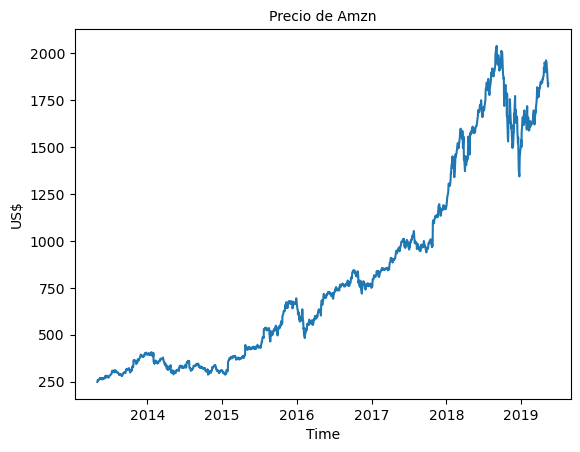

In [3]:
plt.title("Precio de Amzn", size=10)
plt.xlabel("Time", size=10)
plt.ylabel("US$", size=10)
plt.plot(data.loc[:,"AMZN"])
plt.show()

**Variabilidad del Rendimiento Diario**

Si ahora trazamos el rendimiento diario directamente, el rendimiento diario pasa a ser positivo, negativo. 
Y el promedio de que el rendimiento diario es positivo no es obvio.

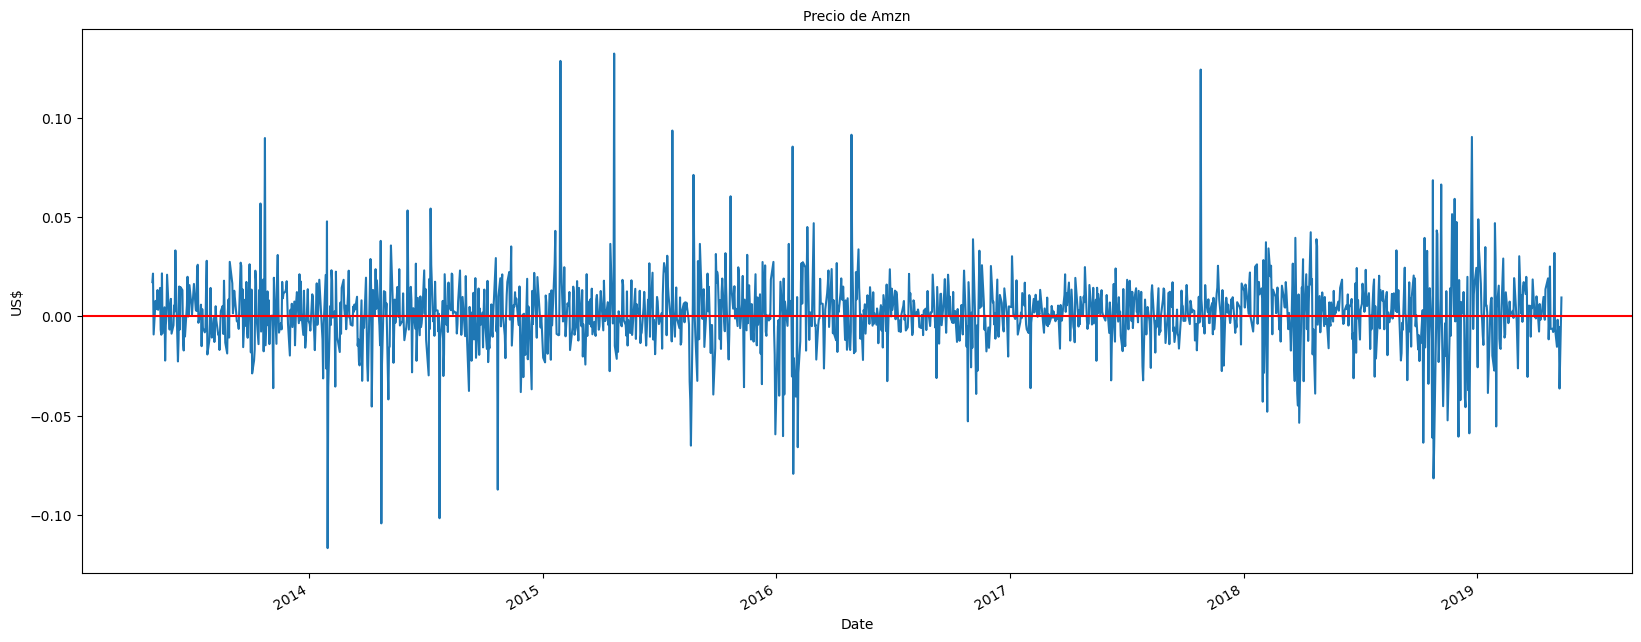

In [4]:
# Log return goes up and down during the period
plt.title("Precio de Amzn", size=10)
plt.xlabel("Time", size=10)
plt.ylabel("US$", size=10)
data['logReturn'] = np.log(data['AMZN'].shift(-1)) - np.log(data['AMZN'])
data['logReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')   # eje de ordenadas = 0
plt.show()

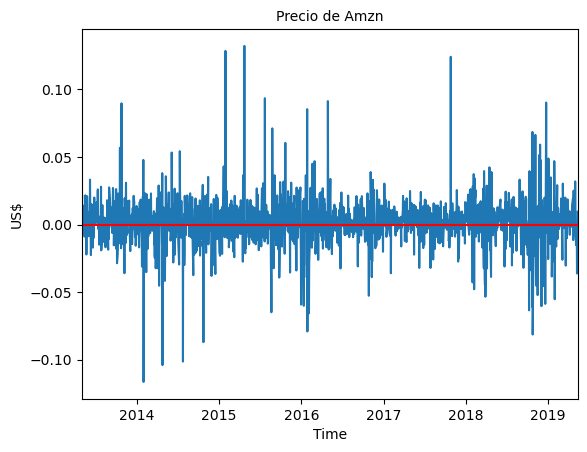

In [5]:
# Log return goes up and down during the period      # otro método de trazar rendimiento diario
plt.title("Precio de Amzn", size=10)
plt.xlabel("Time", size=10)
plt.ylabel("US$", size=10)
plt.xlim(data.index[0],data.index[-1])  # determino eje fila
plt.plot(data.loc[:,'logReturn'])       # determino eje columna a graficar
plt.axhline(0, color='red')   # eje de ordenadas = 0
plt.show()

# data.index[0] → Primer valor del índice del DataFrame (data), es decir, el inicio del eje X.
# data.index[-1] → Último valor del índice del DataFrame (data), es decir, el final del eje X.
# plt.xlim(inicio, fin) → Define el rango del eje X en el gráfico.
# 📌 Contexto típico:
# Si data.index es una serie temporal (por ejemplo, fechas), este comando asegura que el gráfico abarque desde la primera hasta la última fecha del conjunto de datos.

**Análisis del Histograma**

El histograma del rendimiento diario muestra una distribución aproximadamente simétrica alrededor de 0.
A pesar de esto, no es claro si el rendimiento promedio es realmente diferente de 0.
Uso herramienta estadística para verificar si el rendimiento promedio es significativamente diferente de 0.

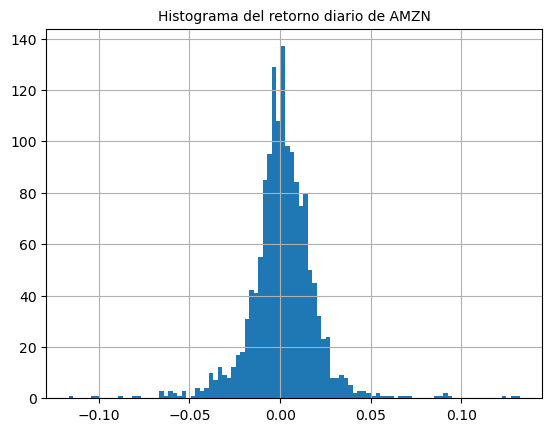

In [6]:
plt.title("Histograma del retorno diario de AMZN", size=10)
data.loc[:,'logReturn'].dropna().hist(bins=100)   # Elimina todos los valores NaN o nulos de la columna "AMZN".
plt.show()

## Steps involved in testing a claim by hypothesis testing

### Step 1: Set hypothesis

$H_0 : \mu = 0$ 
$H_a : \mu \neq 0$

**H0 means the average stock return is 0.** Expresa que no hay una diferencia significativa respecto a un valor de referencia (cero). "El rendimiento diario NO es diferente de 0"

**H1 means the average stock return is not equal to 0.** En un segundo sentido, " El rendimiento diario ES diferente de 0"

### Step 2: Calculate test statistic

$$
z = \frac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}}
$$

In [7]:
# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis

sample_mean = data['logReturn'].mean()
sample_std = data['logReturn'].std(ddof=1)
n = data['logReturn'].shape[0]
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

2.720976500728347


### Step 3: Set desicion criteria

In [8]:
# confidence level  
alpha = 0.05
zleft = norm.ppf(alpha/2, 0, 1) # Distribución normal estándar: Es la distribución normal con media 0 y desviación estándar 1.
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


### Step 4: Make decision - shall we reject H0?

Si $Z_{hat}$ está fuera del intervalo crítico, se rechaza $H_0$.

In [9]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: True


## One-tailed test 

$H_0 : \mu \leq 0$ 
$H_a : \mu > 0$

In [10]:
# step 2
# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis

sample_mean = data['logReturn'].mean()
sample_std = data['logReturn'].std(ddof=1)
n = data['logReturn'].shape[0]

#zhat = None 
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

2.720976500728347


In [11]:
# step 3

alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
# devuelve el cuantil (percentil) inverso de la distribución normal estándar, es decir,
#el valor 𝑧  tal que la probabilidad acumulada hasta ese punto es igual a q.

print(zright)

1.6448536269514722


In [12]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: True


# An alternative method: p-value

In [13]:
# step 3 (p-value)
p = 1 - norm.cdf(zhat, 0, 1)
print(p)

0.0032544694184617473


In [14]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

At significant level of 0.05, shall we reject: True
